# Survival Analysis
__Event__ is the experience of interest such as survive/death or stay/resign  
__Survival time__ is the duration until the event of interest occurs i.e. duration until an employee quits

Censored observations happen in time-to-event data if the event has not been recorded for some individuals  
This can be due to two main reasons:
* Event has not yet occurred (i.e. survival time is unknown/misleading for those who are not resigned yet)
* Missing data (i.e. dropout) or losing contact

There are three types of censorship:
* Left-Censored: Survival duration is less than the observed duration
* Right-Censored: Survival duration is greater than the observed duration
* Interval-Censored: Survival duration can’t exactly be defined

The most common type is right-censored and it is usually taken care of by survival analysis  
However, the other two might indicate a problem in the data and might require further investigation.

__Survival Function__  
T is when the event occurs and t is any point of time during the observation, survival S(t) is the probability of T greater than t. In other words, survival function is the probability of an individual will survive after time t.

__Hazard Function__  
Hazard function or hazard rate, h(t), is the probability of an individual who has survived until time t and experiencing the event of interest at exactly at time t. Hazard function and survival function can be derived from each other by using the following formula.


__Reference:__ https://towardsdatascience.com/hands-on-survival-analysis-with-python-270fa1e6fb41  
__Reference:__ https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html

### Requirements

In [4]:
#!conda install -c sebp scikit-survival
#!pip install lifelines

In [5]:
from sksurv.datasets import load_veterans_lung_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data: features & event
# event is an array that contains a boolean value along with time to event
# True indicates the event has happend and false indicates the event has not happend
features, event = load_veterans_lung_cancer()

main = features
main['event_occurred'] = [i[0] for i in event]
main['time'] = [i[1] for i in event]

In [6]:
main

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment,event_occurred,time
0,69.0,squamous,60.0,7.0,no,standard,True,72.0
1,64.0,squamous,70.0,5.0,yes,standard,True,411.0
2,38.0,squamous,60.0,3.0,no,standard,True,228.0
3,63.0,squamous,60.0,9.0,yes,standard,True,126.0
4,65.0,squamous,70.0,11.0,yes,standard,True,118.0
...,...,...,...,...,...,...,...,...
132,65.0,large,75.0,1.0,no,test,True,133.0
133,64.0,large,60.0,5.0,no,test,True,111.0
134,67.0,large,70.0,18.0,yes,test,True,231.0
135,65.0,large,80.0,4.0,no,test,True,378.0


### Data Exploration - Data Shape

In [15]:
print('Number of rows/observations:',main.shape[0])
print('Number of columns:',main.shape[1])

event_ratio = round(main[main.event_occurred == 1].shape[0] / main.shape[0],2)
print('Event Ratio: {} % Occurrance'.format(event_ratio))

Number of rows/observations: 137
Number of columns: 8
Event Ratio: 0.93 % Occurrance


### Data Exploration - Features

In [45]:
def plot_config(title, axis, y_title, x_title):
    
    # Main Title
    #figure.suptitle('Categorical Plots')

    # Labels
    axis.set_title(title, fontsize=20)
    axis.set_xlabel(x_title, fontsize=15)
    axis.set_ylabel(y_title, fontsize=15)
    
    # Graph Spins
    # Plot 1: Config
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    
    # Tickmark Sizes
    axis.tick_params(axis='both', which='major', labelsize=15)
    
def rods_survival_plot(event_duration, event_occurred, axis, label = None):# Plot: Config

    # Initiate and fit
    kmf = KaplanMeierFitter()
    kmf.fit(durations=event_duration, event_observed=event_occurred, label=label)
    
    # KM Plot
    kmf.survival_function_.plot(ax=axis)

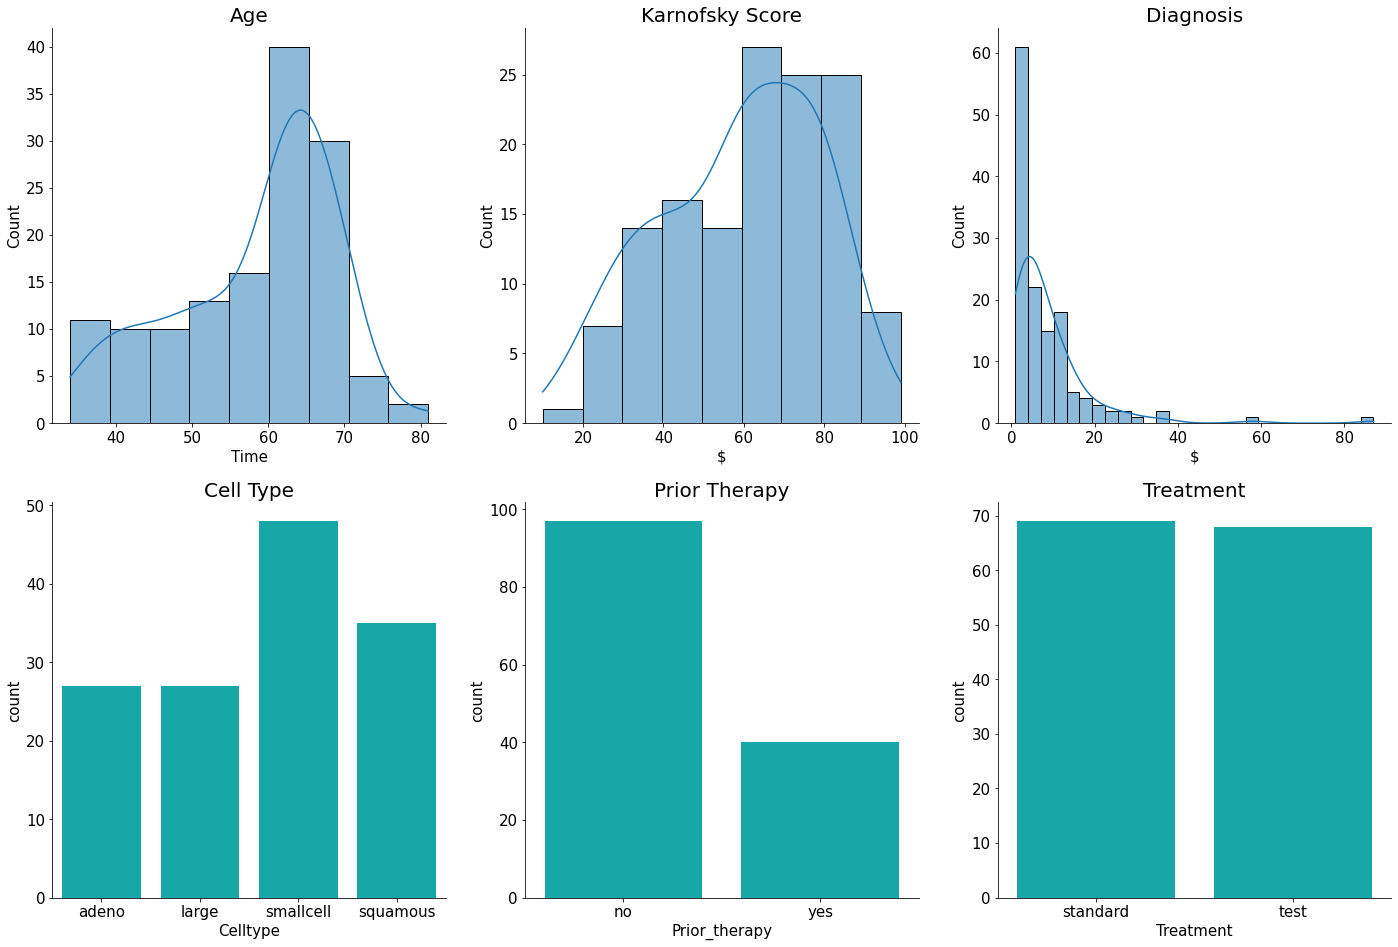

In [20]:
# Creating Figure
figure, axis = plt.subplots(2,3,figsize = (24,16))

# Time Histogram
plot_axis = axis[0,0]
plot_config('Age', plot_axis,'Count','Time')
sns.histplot(main.Age_in_years, kde = True, ax = axis[0,0], edgecolor = 'black')

# Monthly Charges Histogram
plot_axis = axis[0,1]
plot_config('Karnofsky Score', plot_axis,'Count','$')
sns.histplot(main.Karnofsky_score, kde = True, ax = plot_axis, edgecolor = 'black')

# Total Charges Histogram
plot_axis = axis[0,2]
plot_config('Diagnosis', plot_axis,'Count','$')
sns.histplot(main.Months_from_Diagnosis, kde = True, ax = plot_axis, edgecolor = 'black')

# Payment Method Histogram
plot_axis = axis[1,0]
plot_config('Cell Type', plot_axis,'Count','$')
sns.countplot(x='Celltype', data=main, color="c", ax = plot_axis)

# Total Charges Histogram
plot_axis = axis[1,1]
plot_config('Prior Therapy', plot_axis,'Count','$')
sns.countplot(x='Prior_therapy', data=main, color="c", ax = plot_axis)

# Total Charges Histogram
plot_axis = axis[1,2]
plot_config('Treatment', plot_axis,'Count','$')
sns.countplot(x='Treatment', data=main, color="c", ax = plot_axis);

### Survival Function - Kaplan-Meier Estimate

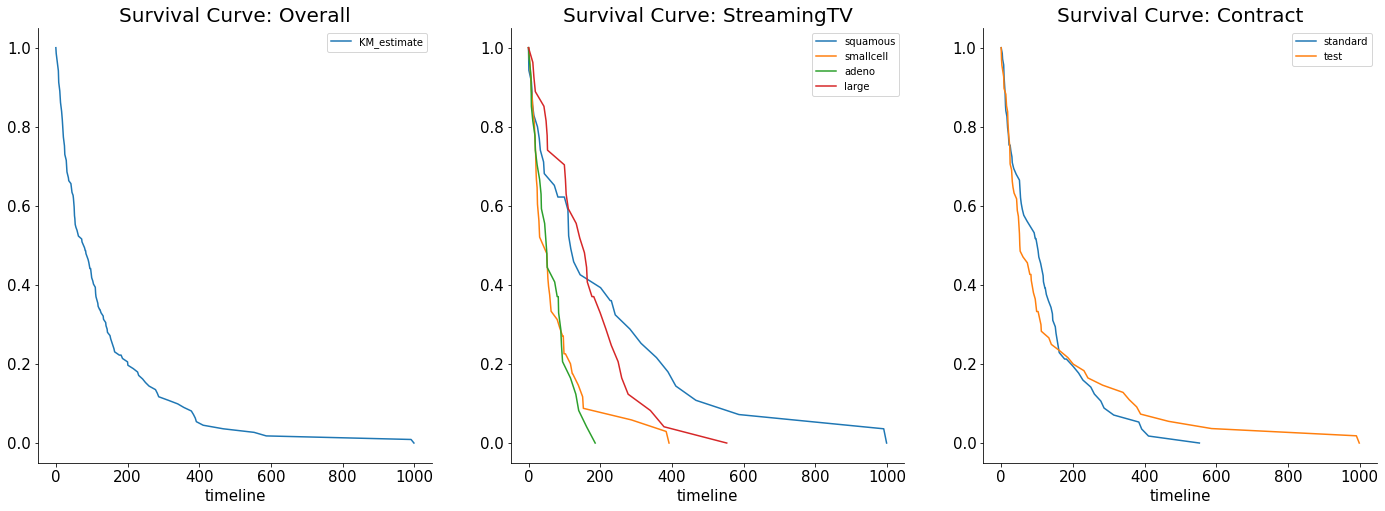

In [46]:
from lifelines import KaplanMeierFitter

# Creating Figure
figure, axis = plt.subplots(1,3,figsize = (24,8))

# Kaplan-Meier Estimate (Overall)
plot_axis = axis[0]
plot_config('Survival Curve: Overall', plot_axis,'','')
rods_survival_plot(main.time, main.event_occurred, plot_axis,label = None)

# Survival Curve By Streaming TV
plot_axis = axis[1]
plot_config('Survival Curve: StreamingTV', plot_axis,'','')
label = 'Celltype'
for value in main[label].unique():
    label_data = main[main[label] == value]
    rods_survival_plot(label_data.time, label_data.event_occurred, plot_axis,label = value)


# Type Of Contract
plot_axis = axis[2]
plot_config('Survival Curve: Contract', plot_axis,'','')
label = 'Treatment'
for value in main[label].unique():
    label_data = main[main[label] == value]
    rods_survival_plot(label_data.time, label_data.event_occurred, plot_axis,label = value)


### Hazard Function - Cox Proportional Hazard Model Summary

In [47]:
from lifelines import CoxPHFitter

# Initialize and fit the model
preliminary_cols = ['Age_in_years','Karnofsky_score','Months_from_Diagnosis','time','event_occurred']
coxph = CoxPHFitter()
coxph.fit(main[preliminary_cols], duration_col='time', event_col='event_occurred')

# Print model summary
coxph.print_summary()

"""
Notes:
Looking at p we can learn 'Age_in_years' and 'Months_from_Diagnosis' are not significant. (since p_value !< .05)
We can also see this with the factor effects plot below.""";

<lifelines.CoxPHFitter: fitted with 137 total observations, 9 right-censored observations>
             duration col = 'time'
                event col = 'event_occurred'
      baseline estimation = breslow
   number of observations = 137
number of events observed = 128
   partial log-likelihood = -484.39
         time fit was run = 2022-04-21 17:02:28 UTC

---
                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                     
Age_in_years           -0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
Karnofsky_score        -0.03       0.97       0.01            -0.04            -0.02                 0.96                 0.98
Months_from_Diagnosis   0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02

                        cmp to     z      p   -log2(p)
covariate                                             
Age_in_years              0.00 -0.25   0.80       0.32
Karnofsky_score           0.00 -6.43 <0.005      32.87
Months_from_Diagnosis     0.00  0.11   0.92       0.13
---
Concordance = 0.71
Partial AIC = 974.79
log-likelihood ratio test = 42.11 on 3 df
-log2(p) of ll-ratio test = 27.97

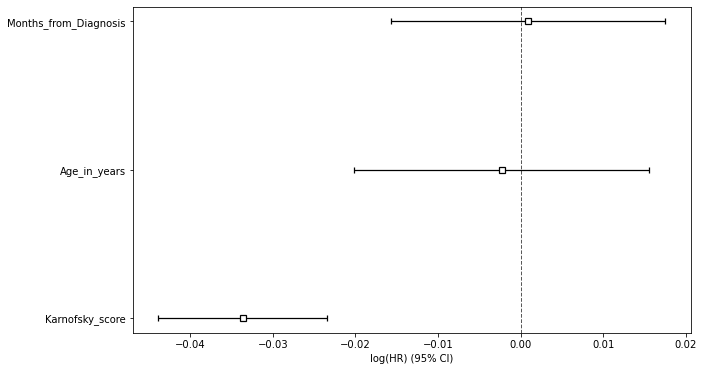

In [48]:
# Plot factor effects 
figure, axis = plt.subplots(1,figsize = (10,6))
coxph.plot();

### Hazard Function - Cox Proportional Hazard Model Prediction

In [49]:
# Current patients still alive
test_sample = main.loc[main['event_occurred'] == False]

"""
Notes:
Predicted survival probability of patient 1 after 999 more days is 0.5597% however it is 08.92% for patient 63
Like other regression models, also Cox-PH model makes initial assumptions about data. To check if assumptions hold, we can use check_assumptions.
"""

# Predict survival probabilities 
coxph.predict_survival_function(test_sample,conditional_after=test_sample['time'])

,9,13,20,21,63,71,72,90,109
1.0,0.994635,0.997370,9.810459e-01,0.978913,0.995802,0.996527,0.991616,0.990913,0.994828
2.0,0.989298,0.994747,9.624511e-01,0.958271,0.991622,0.993066,0.983303,0.981909,0.993094
3.0,0.983990,0.992104,9.442087e-01,0.937566,0.987459,0.989616,0.975060,0.978287,0.991362
4.0,0.975837,0.989469,9.349512e-01,0.930489,0.983314,0.984356,0.966885,0.974678,0.989633
7.0,0.961253,0.965325,9.077198e-01,0.905817,0.979714,0.965104,0.942771,0.963930,0.984309
...,...,...,...,...,...,...,...,...,...
467.0,0.083849,0.142681,8.316006e-04,0.029764,0.311625,0.158865,0.013137,0.064966,0.385145
553.0,0.062215,0.104415,5.677982e-04,0.018886,0.290629,0.117289,0.009972,0.048105,0.327711
587.0,0.058988,0.094975,4.882885e-04,0.017521,0.282724,0.112700,0.008942,0.045375,0.321021
991.0,0.005597,0.014995,6.848158e-07,0.000631,0.089248,0.019001,0.000110,0.003443,0.127613


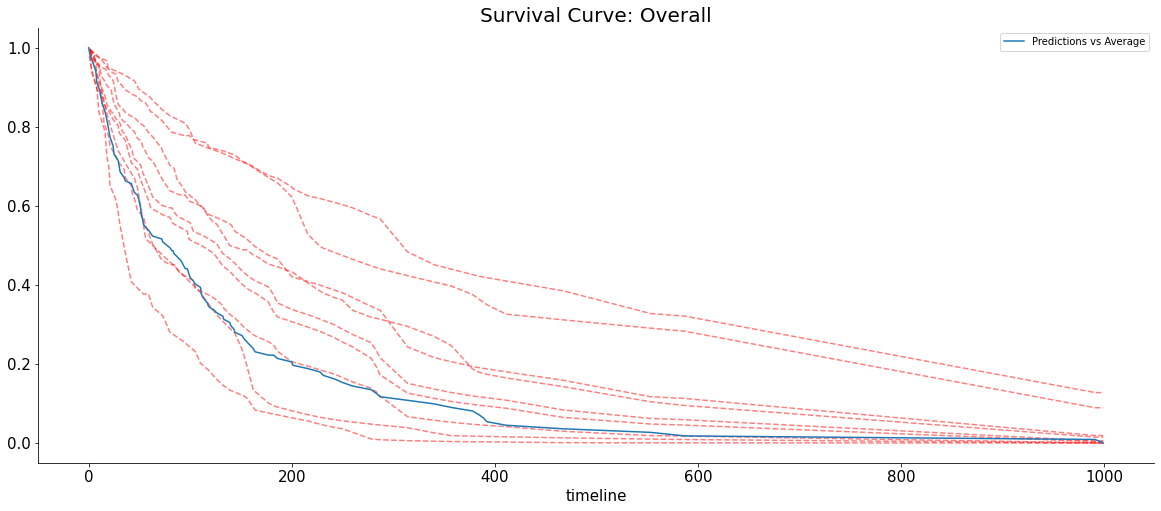

In [55]:
import matplotlib.patches as mpatches

figure, axis = plt.subplots(1,figsize = (20,8))

plot_axis = axis
plot_config('Predidction View', axis,'','')

predictions = coxph.predict_survival_function(test_sample,conditional_after=test_sample['time']).transpose()

for i in range(predictions[0:5000].shape[0]): 
    plt.plot(predictions.iloc[i], color = 'red', alpha = 0.5, linestyle='--')

# Kaplan-Meier Estimate (Overall)]
plot_config('Survival Curve: Overall', plot_axis,'','')
rods_survival_plot(main.time, main.event_occurred, plot_axis, 'Predictions vs Average')